In [ ]:
!pip install -Uqq fastai

In [ ]:
!wget https://lp-prod-resources.s3-us-west-2.amazonaws.com/other/Deploying+a+Deep+Learning+Model+on+Web+and+Mobile+Applications+Using+TensorFlow/Food+101+-+Data+Subset.zip
!unzip Food+101+-+Data+Subset.zip

In [ ]:
!mv food-101-subset/images/ .

In [5]:
from fastai.vision.all import *

In [6]:
path = Path('images')

In [7]:
path.ls()

(#4) [Path('images/.DS_Store'),Path('images/falafel'),Path('images/apple_pie'),Path('images/caesar_salad')]

In [8]:
files = get_image_files(path)

In [9]:
food = DataBlock(
          blocks=(ImageBlock,CategoryBlock),
          get_items= get_image_files,
          splitter=RandomSplitter(valid_pct=0.2,seed=42),
          get_y=parent_label,
          item_tfms=RandomResizedCrop(224, min_scale=0.5),
           batch_tfms=[*aug_transforms(),
                    Normalize.from_stats(*imagenet_stats)])

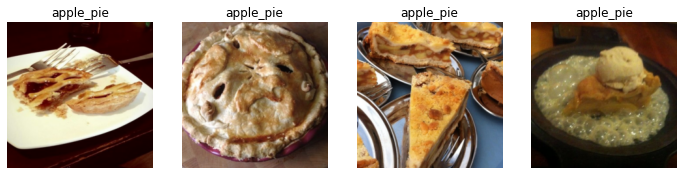

In [10]:
dls = food.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy).to_fp16()
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.896984,0.487057,0.860000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.416733,0.352917,0.888333,00:06
1,0.328569,0.300005,0.911667,00:06


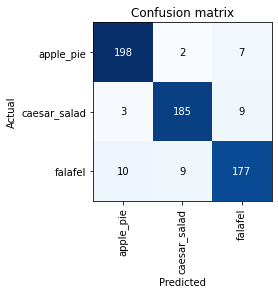

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
dummy_input = torch.randn(1, 3, 224, 224, device='cuda')
onnx_path =  "./resnet.onnx"
torch.onnx.export(learn.model, dummy_input, onnx_path, verbose=False)

In [14]:
import torchvision.models as models
model = models.mobilenet_v2

In [15]:
learn = cnn_learner(dls, models.mobilenet_v2, cut=-1,metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.819931,0.489205,0.888333,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.381971,0.435015,0.895000,00:10
1,0.344805,0.423505,0.895000,00:09
2,0.288654,0.361836,0.901667,00:10
3,0.237687,0.334634,0.903333,00:09


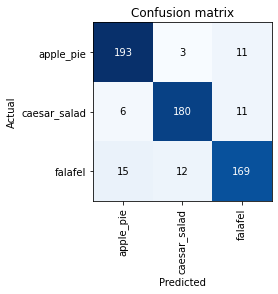

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [17]:
dummy_input = torch.randn(1, 3, 224, 224, device='cuda')
onnx_path =  "./mobilenet.onnx"
torch.onnx.export(learn.model, dummy_input, onnx_path, verbose=False)